In [1]:
%load_ext autoreload
%autoreload 2

from utils import load_input_image
import matplotlib.pyplot as plt
from segmentation import Segmentation
from classification import Classification
from features_extraction import FeaturesExtraction

In [2]:
imgs = {i: load_input_image(i,folder="train") for i in range(15)}

In [5]:
n = 1
img = imgs[n]

seg = Segmentation(img)
seg.find_pieces()

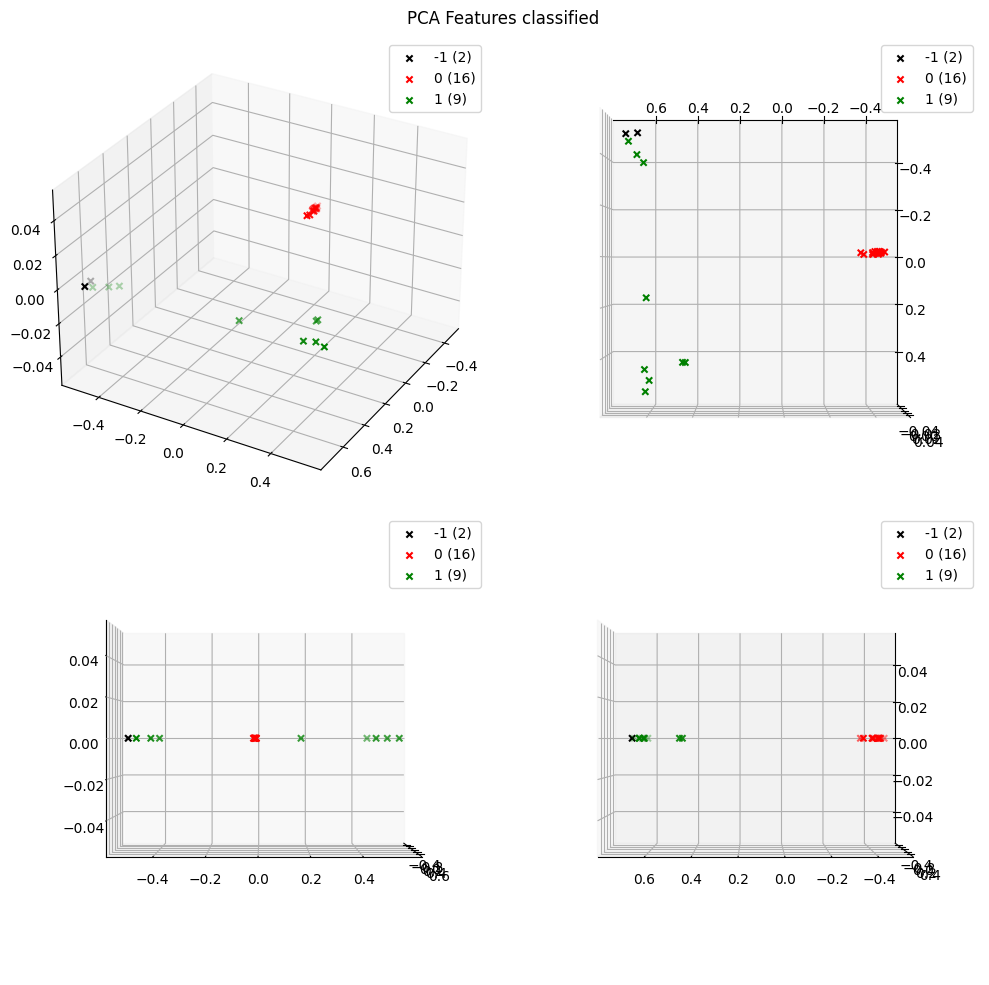

array([ 0,  0,  1,  1,  0,  0,  0,  0, -1,  0,  0,  1,  1,  0,  0,  1,  0,
        1,  1,  0, -1,  0,  1,  1,  0,  0,  0], dtype=int64)

In [6]:
features_extractor = FeaturesExtraction(seg.pieces)
features_extractor.find_features_PCA()

classifier = Classification(features_extractor.features_PCA)
classifier.classify(method=1)
classifier.classified_plot()
classifier.labels

In [7]:
classifier.labels

array([ 0,  0,  1,  1,  0,  0,  0,  0, -1,  0,  0,  1,  1,  0,  0,  1,  0,
        1,  1,  0, -1,  0,  1,  1,  0,  0,  0], dtype=int64)

In [22]:
(seg.pieces[0]).shape

(128, 128, 3)

In [36]:
import numpy as np

def return_clusters(pieces, labels):
    clusters = []
    outliers = []

    unique_labels = np.unique(labels)
    for label in unique_labels:
        idx = np.where(labels == label)[0]
        if label == -1:
            outliers = [pieces[i] for i in idx]
        else:
            cluster = [pieces[i] for i in idx]
            clusters.append(cluster)
    
    return outliers, clusters

outliers, clusters = return_clusters(seg.pieces, classifier.labels)




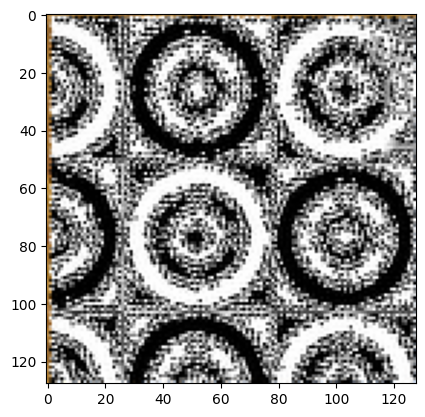

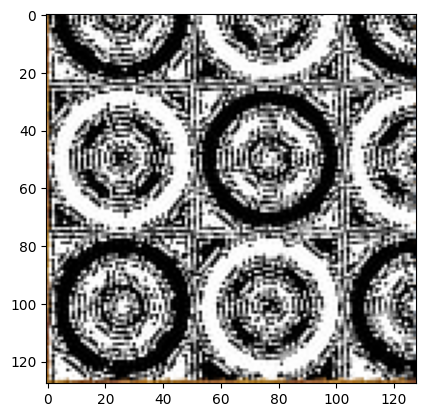

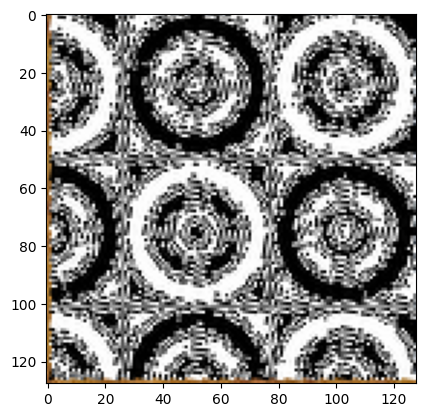

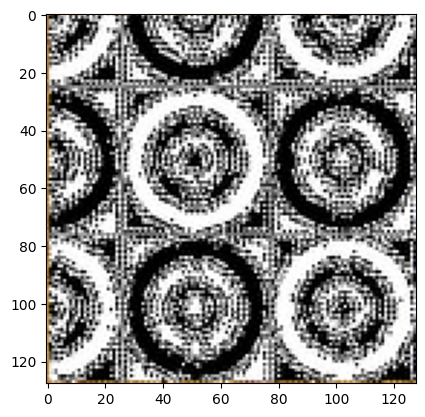

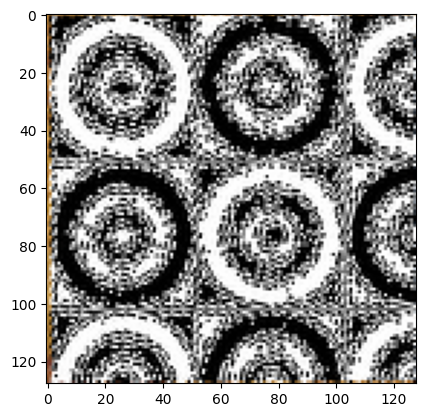

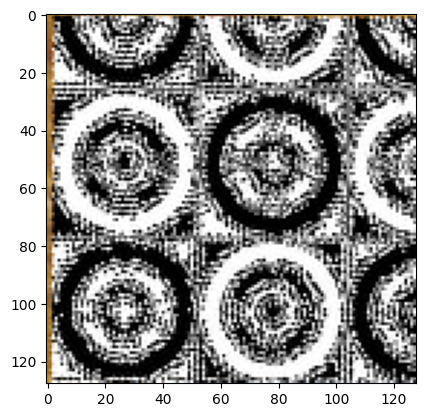

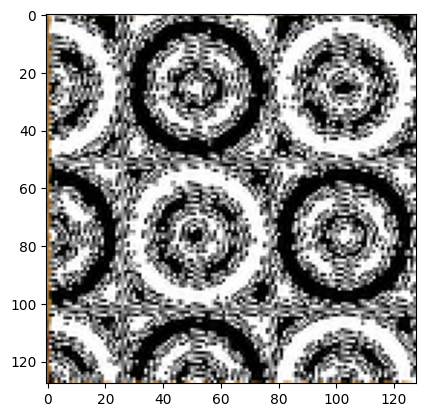

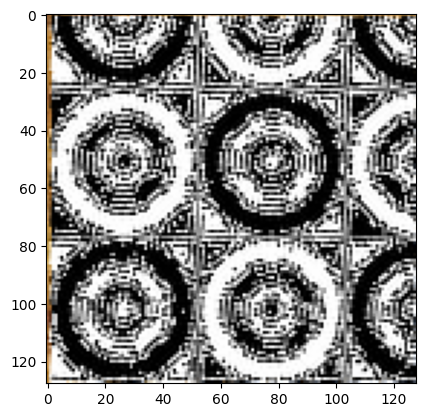

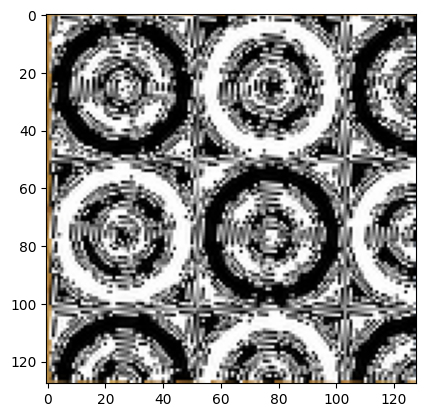

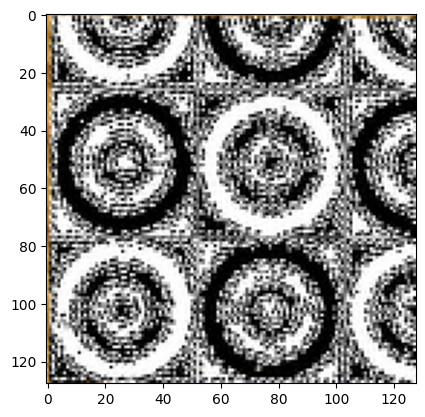

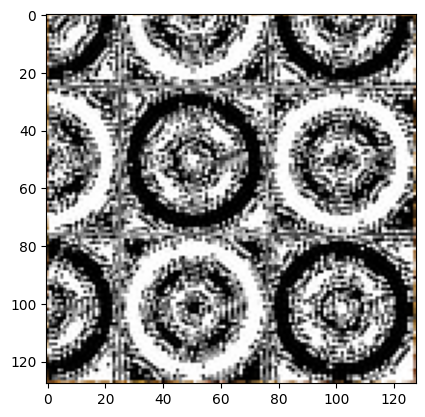

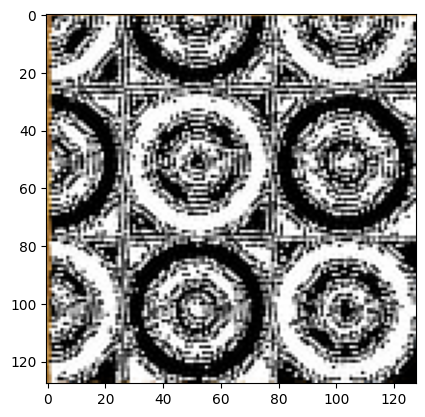

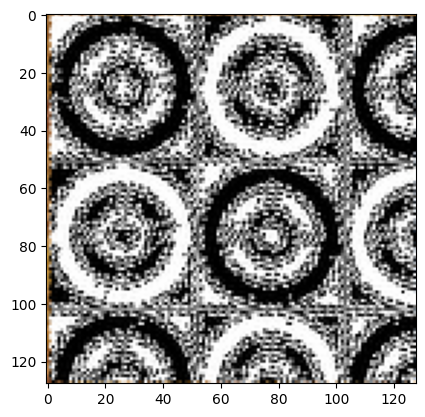

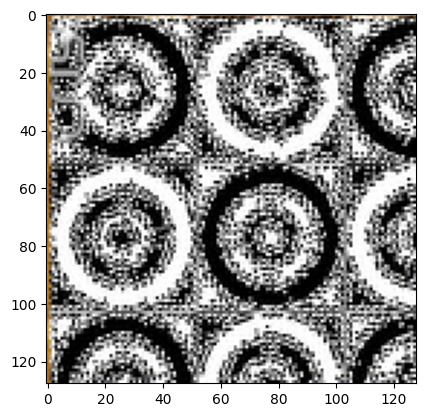

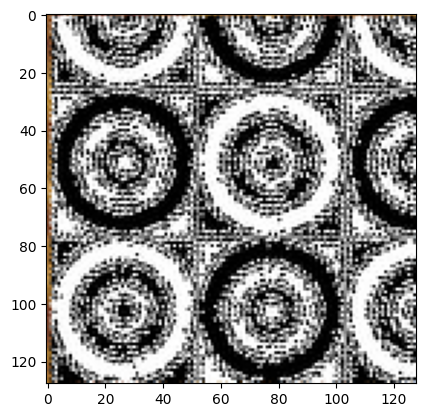

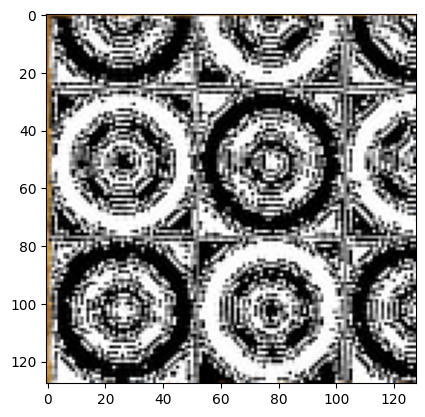

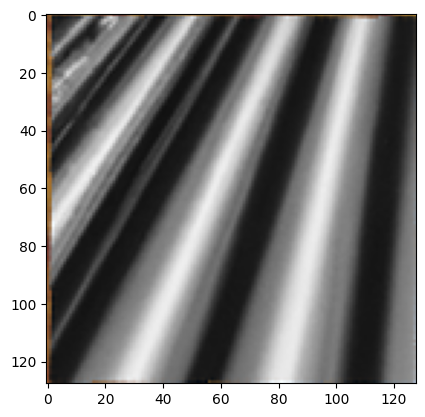

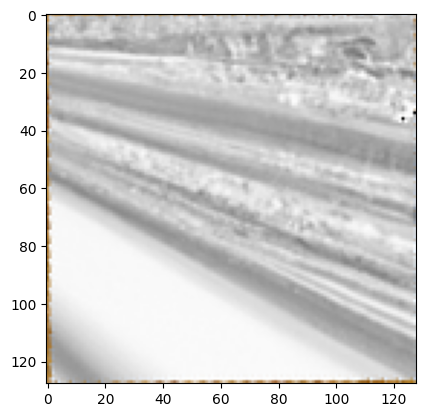

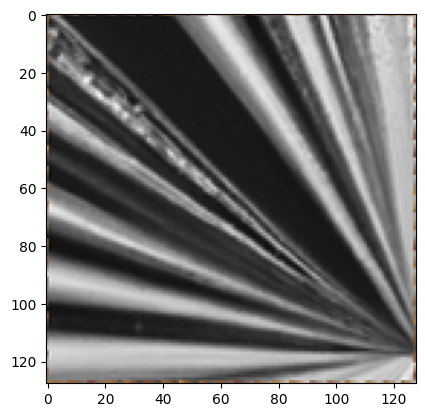

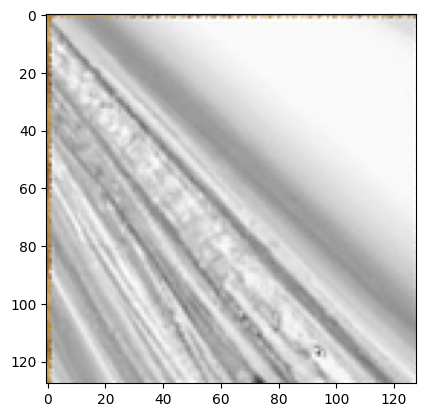

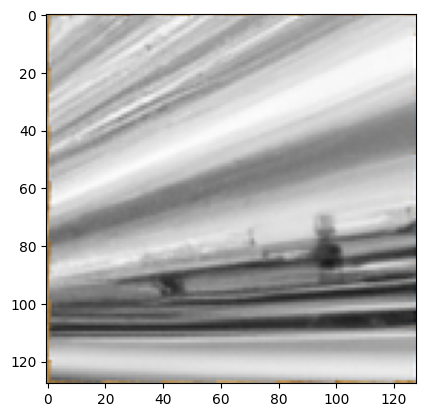

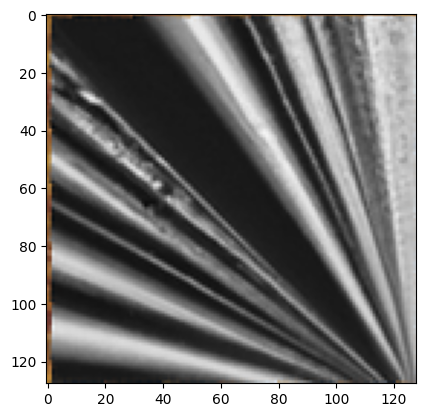

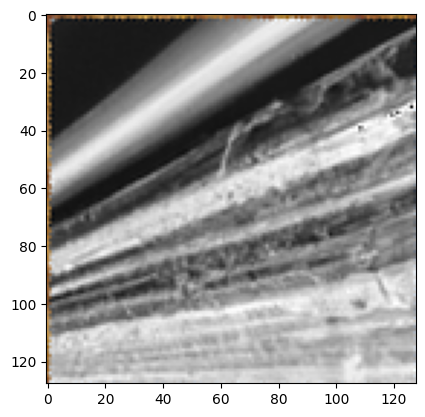

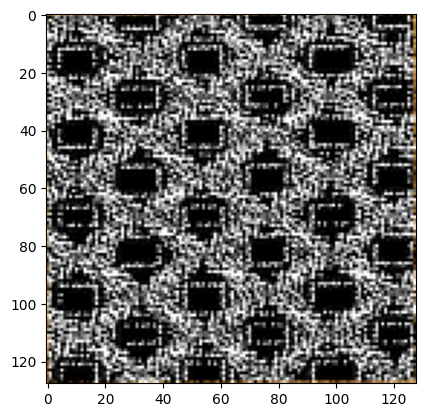

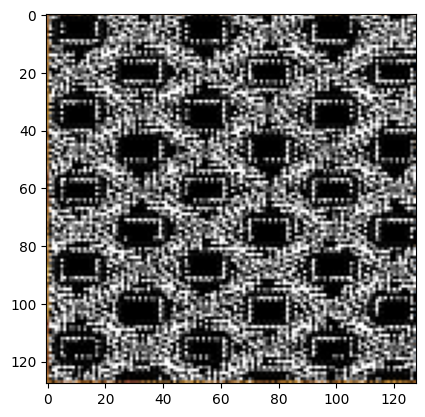

In [40]:
for cluster in clusters:
    for piece in cluster:
        plt.imshow(piece)
        plt.show()

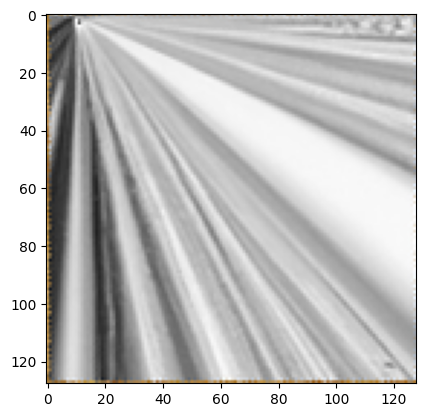

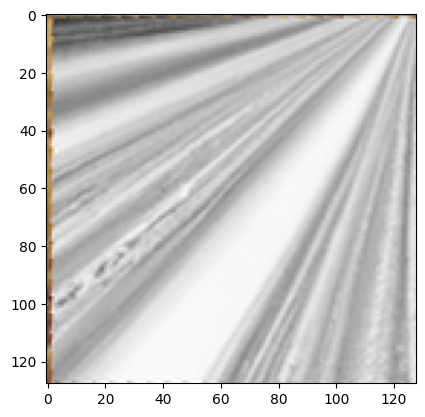

In [34]:
for outlier in outliers:
    plt.imshow(outlier)
    plt.show()